## Synthetic data

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score

from synthesize_data_multiclass import synthesize_data
import ER_multiclass as ER

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(1)

In [3]:
def inference(X_train,y_train,X_test,y_test,method='expectation_reflection'):
    if method == 'expectation_reflection':
        h0,w = ER.fit(X_train,y_train,niter_max=100,regu=0.0001)
        y_pred = ER.predict(X_test,h0,w)
    else:
        if method == 'logistic_regression':
            model = LogisticRegression(multi_class='multinomial',solver='saga',max_iter=200)

        if method == 'naive_bayes': 
            model = GaussianNB()

        if method == 'random_forest':
            model = RandomForestClassifier(criterion = "gini", random_state = 1,
                           max_depth=3, min_samples_leaf=5,n_estimators=100)   
            
        if method == 'decision_tree':
            model = DecisionTreeClassifier()  

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
    accuracy = accuracy_score(y_test,y_pred)                
                  
    return accuracy

In [4]:
#list_methods=['logistic_regression','naive_bayes','random_forest','decision_tree','expectation_reflection']
list_methods=['logistic_regression','expectation_reflection']
def compare_inference(X,y,train_size):
    npred = 10
    accuracy = np.zeros((len(list_methods),npred))
    precision = np.zeros((len(list_methods),npred))
    recall = np.zeros((len(list_methods),npred))
    accuracy_train = np.zeros((len(list_methods),npred))
    for ipred in range(npred):
        #X, y = shuffle(X, y)
        X_train0,X_test,y_train0,y_test = train_test_split(X,y,test_size=0.2,random_state = ipred)

        idx_train = np.random.choice(len(y_train0),size=int(train_size*len(y)),replace=False)
        X_train,y_train = X_train0[idx_train],y_train0[idx_train]

        for i,method in enumerate(list_methods):
            accuracy[i,ipred] = inference(X_train,y_train,X_test,y_test,method)
            
    return accuracy.mean(axis=1)

In [5]:
def plot_accuracy():
    plt.figure(figsize=(4,3))    
    plt.plot(list_train_size,acc[:,0],'k--',marker='o',mfc='none',label='Logistic Regression')
    #plt.plot(list_train_size,acc[:,1],'b--',marker='s',mfc='none',label='Naive Bayes')
    #plt.plot(list_train_size,acc[:,2],'r--',marker='^',mfc='none',label='Random Forest')
    #plt.plot(list_train_size,acc[:,3],'b--',label='Decision Tree')
    plt.plot(list_train_size,acc[:,-1],'k-',marker='o',label='Expectation Reflection')
    plt.xlabel('train size')
    plt.ylabel('accuracy')
    plt.legend()

### Binary data

In [6]:
l = 2000 ; n = 40 ; m = 3; g = 10.

In [7]:
X,y = synthesize_data(l,n,m,g,data_type='continuous')

In [8]:
print(np.unique(y,return_counts = True))

(array([0., 1., 2.]), array([673, 570, 757]))


In [9]:
#list_train_size  = [0.8,0.6,0.4,0.2]
list_train_size  = [0.4]
acc = np.zeros((len(list_train_size),len(list_methods)))
for i,train_size in enumerate(list_train_size):
    acc[i,:] = compare_inference(X,y,train_size)
    print(train_size,acc[i,:])

0.4 [0.867 0.863]


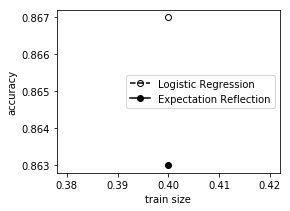

In [10]:
plot_accuracy()